## Ejercicio 1

Raíces reales:
-152.000000
-136.000000


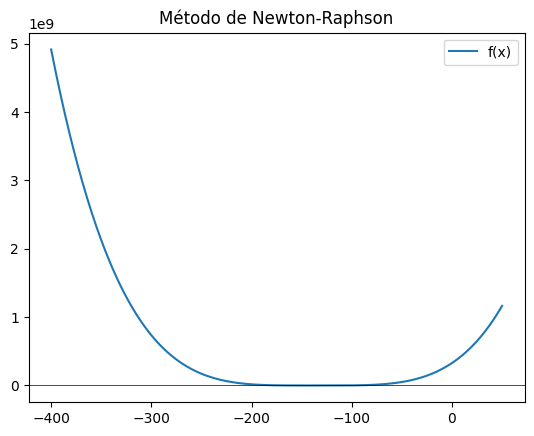

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

coeffs = [1, 540, 109124, 9781632, 328188672]

raices = np.roots(coeffs)

raices_reales = [r.real for r in raices if np.isreal(r)]
print("Raíces reales:")
for r in raices_reales:
    print(f"{r:.6f}")

def f(x):
    return x**4 + 540*x**3 + 109124*x**2 + 9781632*x + 328188672

def df(x):
    return 4*x**3 + 3*540*x**2 + 2*109124*x + 9781632

x0 = -300
x_vals = [x0]

for _ in range(10):
    x1 = x0 - f(x0) / df(x0)
    x_vals.append(x1)
    x0 = x1

fig, ax = plt.subplots()
x = np.linspace(-400, 50, 400)
ax.plot(x, f(x), label='f(x)')
point, = ax.plot([], [], 'ro') 
line, = ax.plot([], [], 'r--') 
ax.axhline(0, color='black', lw=0.5)
ax.legend()
plt.title("Método de Newton-Raphson")

def animate(i):
    if i == 0:
        return point, line
    x_n = x_vals[i-1]
    y_n = f(x_n)
    slope = df(x_n)
    tangent = slope * (x - x_n) + y_n
    point.set_data([x_n], [y_n])
    line.set_data(x, tangent)
    return point, line

ani = FuncAnimation(fig, animate, frames=len(x_vals), interval=800)
plt.show()